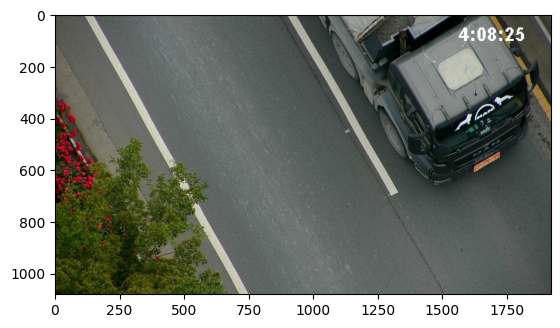

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("./sample/sample8/2023-05-19_132833.443.jpg") # , cv2.IMREAD_GRAYSCALE
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def show(img):
    cv2.imshow("image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def plt_show(img):
    convert = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(convert)
    plt.show()

dst = img.copy()
plt_show(img)
# show(img)

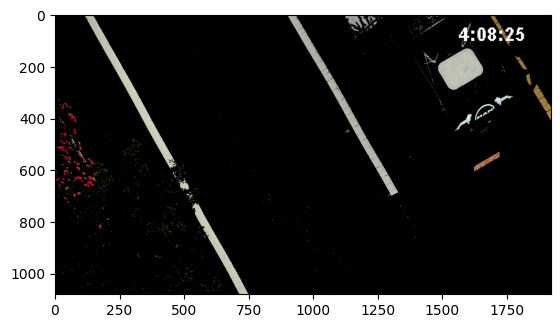

In [362]:
# BGR이미지를 HSL이미지로 변환 후 노락색과 흰색 부분만 검출

def color_filter(image):
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

    lower = np.array([0, 150, 0]) # 20, 150, 20
    upper = np.array([255, 255, 255])

    yellow_lower = np.array([0, 85, 81]) # 0, 85, 81
    yellow_upper = np.array([190, 255, 255]) # 190, 255, 255

    yellow_mask = cv2.inRange(hls, yellow_lower, yellow_upper)
    white_mask = cv2.inRange(hls, lower, upper)
    mask = cv2.bitwise_or(yellow_mask, white_mask)
    masked = cv2.bitwise_and(image, image, mask = mask)
    
    return masked
w_f_r_img = color_filter(dst)
plt_show(w_f_r_img)


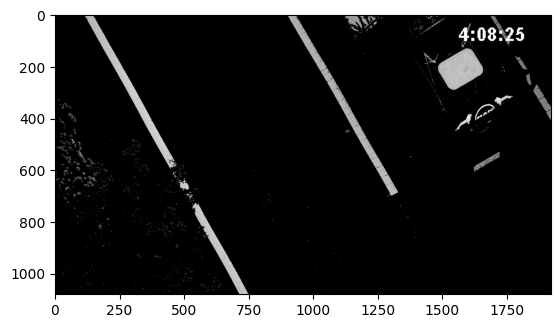

In [363]:
gray = cv2.cvtColor(w_f_r_img, cv2.COLOR_BGR2GRAY)

plt_show(gray)

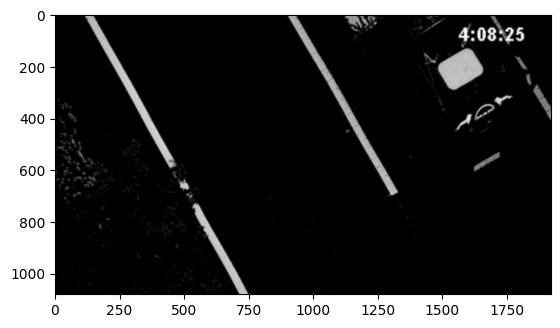

In [364]:
blur = cv2.GaussianBlur(gray, (0, 0), 2)

plt_show(blur)

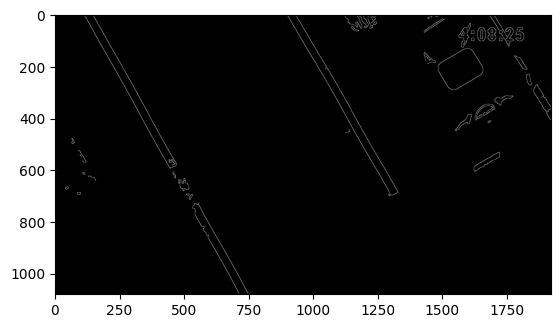

In [372]:
canny = cv2.Canny(blur, 3000, 1500, apertureSize = 5, L2gradient = False)

plt_show(canny)

In [146]:
img = cv2.imread("2022-10-20_134949.508.jpg")

dst = img.copy()

w_f_r_img = color_filter(dst)

gray = cv2.cvtColor(w_f_r_img, cv2.COLOR_BGR2GRAY)

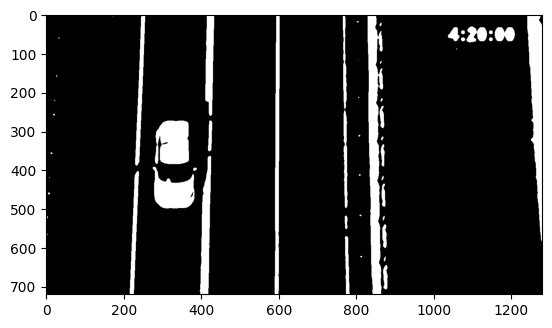

In [147]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread("2022-10-20_134949.508.jpg")
dst = src.copy()

w_f_r_img = color_filter(dst)
gray = cv2.cvtColor(w_f_r_img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (0, 0), 3)
# th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
#                                      cv2.THRESH_BINARY, 9, 3)
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_OTSU)
# canny = cv2.Canny(thresh, 1500, 3000, apertureSize = 5, L2gradient = False)
# lines = cv2.HoughLinesP(th3, 0.8, np.pi / 180, 100, minLineLength = 50, maxLineGap = 1)


plt_show(thresh)

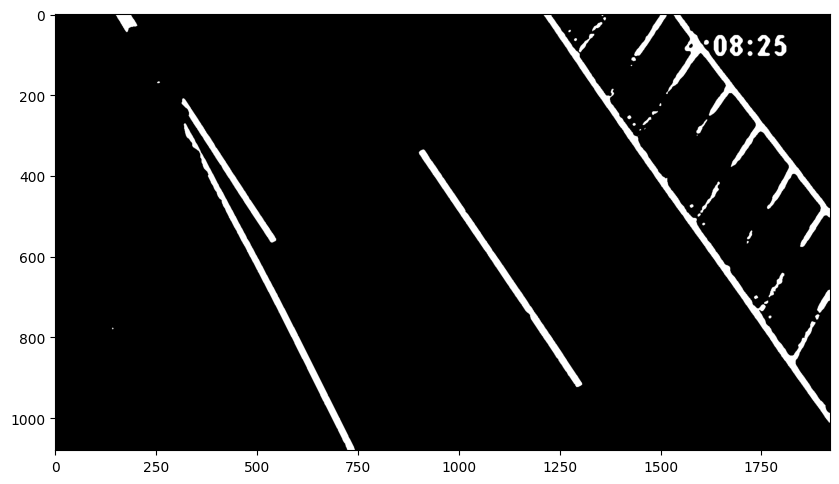

In [230]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread("./sample/sample8/2023-05-19_132804.447.jpg")
dst = src.copy()

# w_f_r_img = color_filter(dst)
# gray = cv2.cvtColor(w_f_r_img, cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# # th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
# #                                      cv2.THRESH_BINARY, 9, 3)
# ret, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
# canny = cv2.Canny(thresh, 1500, 3000, apertureSize = 5, L2gradient = False)
# lines = cv2.HoughLinesP(canny, 0.8, np.pi / 180, 100, minLineLength = 50, maxLineGap = 1)

w_f_r_img = color_filter(dst)
gray = cv2.cvtColor(w_f_r_img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (0, 0), 3)
th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, 9, 3)

ret, thresh = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)

canny = cv2.Canny(thresh, 3000, 1500, apertureSize = 5, L2gradient = False)

plt.figure(figsize = (10,10))
plt_show(thresh)

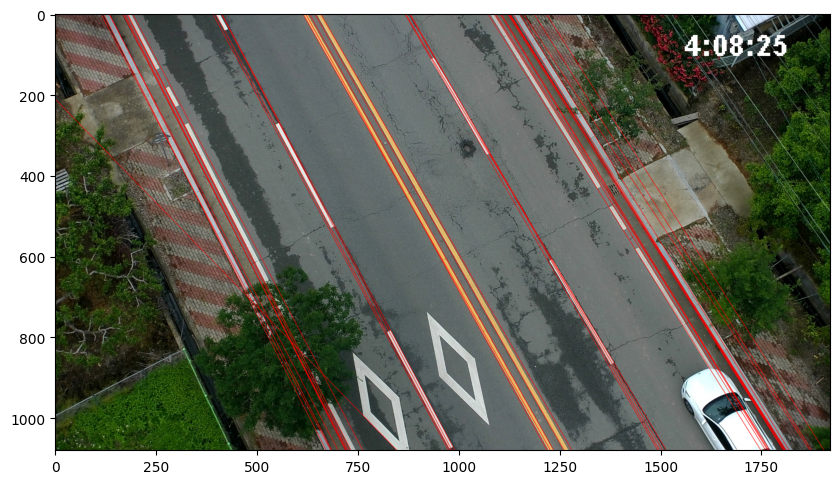

In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread("./sample/sample8/2023-05-19_132618.946.jpg")
dst = src.copy()

# w_f_r_img = color_filter(dst)
# gray = cv2.cvtColor(w_f_r_img, cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# # th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
# #                                      cv2.THRESH_BINARY, 9, 3)
# ret, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
# canny = cv2.Canny(thresh, 1500, 3000, apertureSize = 5, L2gradient = False)
# lines = cv2.HoughLinesP(canny, 0.8, np.pi / 180, 100, minLineLength = 50, maxLineGap = 1)

gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, 9, 3)

ret, thresh = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)

canny = cv2.Canny(th3, 1500, 3000, apertureSize = 5, L2gradient = False)
lines = cv2.HoughLinesP(canny, rho = 0.8, theta = np.pi / 180, threshold = 90, minLineLength = 30, maxLineGap = 1)

degree_list = []
new_lines = []

# for line in lines:
#     # 검출된 선 그리기 ---③
#     x1, y1, x2, y2 = line[0]
#     cv2.line(dst, (x1,y1), (x2, y2), (0,255,0), 1)

for i in lines:
    if int(i[0][2]) - int(i[0][0]) == 0:
        a = 0
        cv2.line(dst, (int(i[0][0]),0), (int(i[0][0]), int(dst.shape[1])) ,(0, 0, 255), 1, cv2.LINE_AA)
        new_lines.append(i)
    else:
        a = (int(i[0][3]) - int(i[0][1])) / (int(i[0][2]) - int(i[0][0]))
        if a > 1 and a < 2:
            b = int(i[0][1]) - a * int(i[0][0])
            cv2.line(dst, (0, int(b)), (int(dst.shape[1]), int(a*dst.shape[1]+b)), (0, 0, 255), 1, cv2.LINE_AA)
            new_lines.append(i)
    degree_list.append(a)

plt.figure(figsize = (10,10))
plt_show(dst)

# cv2.imshow("dst", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [36]:
len(new_lines)

39

In [37]:
# 왼쪽, 오른쪽 경계 추출

fitx_list = []

for i in new_lines:
    fitx_list.append(i[0][0])
    
min_x = min(fitx_list)
max_x = max(fitx_list)

for j in new_lines:
    if j[0][0] == min_x:
        left_fitx = j
    elif j[0][0] == max_x:
        right_fitx = j

print(left_fitx)
print(right_fitx)

[[152  72 172 110]]
[[1631  801 1655  839]]


In [38]:
if int(left_fitx[0][2]) - int(left_fitx[0][0]) == 0:
    left_line = np.array([int(left_fitx[0][0]), 0, int(left_fitx[0][0]), dst.shape[1]])
else:
    a = (int(left_fitx[0][3]) - int(left_fitx[0][1])) / (int(left_fitx[0][2]) - int(left_fitx[0][0]))
    b = int(left_fitx[0][1]) - a * int(left_fitx[0][0])
    left_line = np.array([0, int(b), int(dst.shape[1]), int(a * dst.shape[1] + b)])

if int(right_fitx[0][2]) - int(right_fitx[0][0]) == 0:
    right_line = np.array([int(right_fitx[0][0]), 0, int(right_fitx[0][0]), dst.shape[1]])
else:
    a = (int(right_fitx[0][3]) - int(right_fitx[0][1])) / (int(right_fitx[0][2]) - int(right_fitx[0][0]))
    b = int(right_fitx[0][1]) - a * int(right_fitx[0][0])
    right_line = np.array([0, int(b), int(dst.shape[1]), int(a * dst.shape[1] + b)])
    
print(left_line)
print(right_line)

[   0 -216 1920 3431]
[    0 -1781  1920  1258]


In [39]:
left_fitx_split = np.split(left_line, 2, axis = 0)
right_fitx_split = np.split(right_line, 2, axis = 0)
print(left_fitx_split)
print(right_fitx_split)

[array([   0, -216]), array([1920, 3431])]
[array([    0, -1781]), array([1920, 1258])]


In [40]:
pts = np.concatenate((left_fitx_split, right_fitx_split), axis = 0)

pts2 = np.array([pts[0], pts[1], pts[3], pts[2]])
pts2

array([[    0,  -216],
       [ 1920,  3431],
       [ 1920,  1258],
       [    0, -1781]])

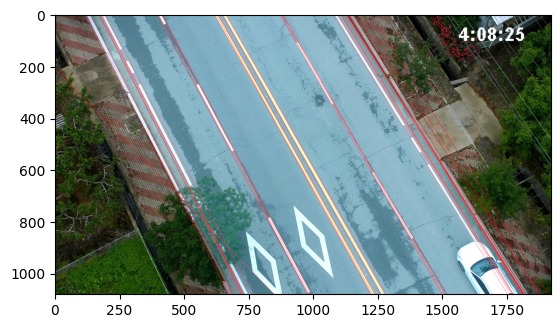

In [41]:
warp_zero = np.zeros([dst.shape[0], dst.shape[1]])
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

cv2.fillPoly(color_warp, np.int_([pts2]), (216, 168, 74))

result = cv2.addWeighted(dst, 1, color_warp, 0.4, 0, dtype = cv2.CV_8U)

plt_show(result)
# show(result)

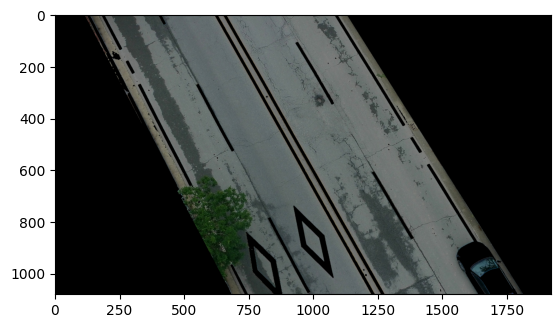

In [45]:
# 도로 외 영역, 차선 제거
dst2 = src.copy()

def trim_lane(image):
    image[color_warp == 0] = image[color_warp == 0] * 0
    image[thresh != 0] = image[thresh != 0] * 0

    # for k in range(len(fitx_list)):
    #     for i, j in zip(fitx_list[k], ploty):
    #         cv2.line(image, (int(i), int(j)), (int(i), int(j)), (0), 10)
    
    return image

result2 = trim_lane(dst2)
plt_show(result2)

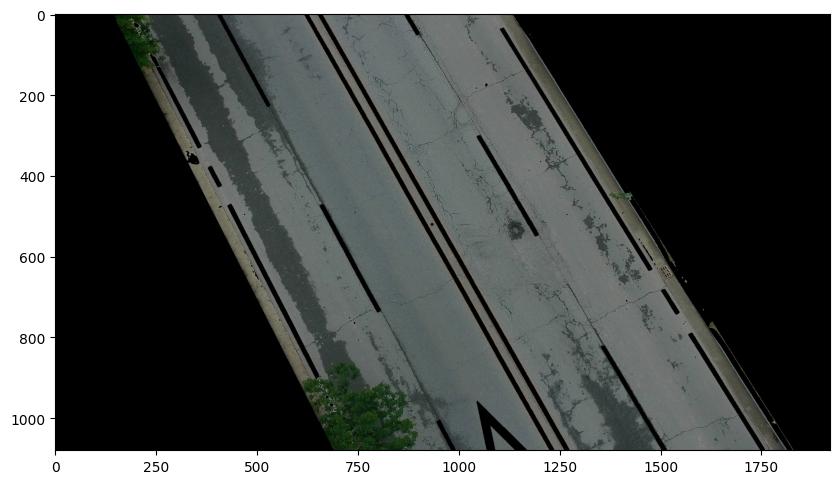

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

path = "C:/Users/pc2/Desktop/YOLOPv2/sample/sample8/"
file_name = "2023-05-19_132619.950.jpg"

src = cv2.imread(path + file_name)
src_name = os.path.splitext(file_name)
dst = src.copy()

gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, 9, 3)

ret, thresh = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)

canny = cv2.Canny(th3, 1500, 3000, apertureSize = 5, L2gradient = False)

def hough_transform(canny_image, org_img):
    lines = cv2.HoughLinesP(canny_image, 0.8, np.pi / 180, 90, minLineLength = 30, maxLineGap = 1)

    degree_list = []
    new_lines = []

    for i in lines:
        if int(i[0][2]) - int(i[0][0]) == 0:
            a = 0
            cv2.line(org_img, (int(i[0][0]),0), (int(i[0][0]), int(org_img.shape[1])) ,(0, 0, 255), 1, cv2.LINE_AA)
            new_lines.append(i)
        else:
            a = (int(i[0][3]) - int(i[0][1])) / (int(i[0][2]) - int(i[0][0]))
            if abs(a) > 1 and abs(a) < 2:
                b = int(i[0][1]) - a * int(i[0][0])
                cv2.line(org_img, (0, int(b)), (int(org_img.shape[1]), int(a*org_img.shape[1]+b)), (0, 0, 255), 1, cv2.LINE_AA)
                new_lines.append(i)
        degree_list.append(a)
        
    return new_lines, lines, degree_list
    
new_lines, _, _ = hough_transform(canny, dst)

# 왼쪽, 오른쪽 경계 추출
def extract_boundary(new_line_list):
    fitx_list = []

    for i in new_line_list:
        fitx_list.append(i[0][0])
        
    min_x = min(fitx_list)
    max_x = max(fitx_list)

    for j in new_line_list:
        if j[0][0] == min_x:
            left_fitx = j
        elif j[0][0] == max_x:
            right_fitx = j
            
    return left_fitx, right_fitx
            
left_fitx, right_fitx = extract_boundary(new_lines)

# 경계선 연장
def extend_line(left_fitx, right_fitx):
    if int(left_fitx[0][2]) - int(left_fitx[0][0]) == 0:
        left_line = np.array([int(left_fitx[0][0]), 0, int(left_fitx[0][0]), dst.shape[1]])
    else:
        a = (int(left_fitx[0][3]) - int(left_fitx[0][1])) / (int(left_fitx[0][2]) - int(left_fitx[0][0]))
        b = int(left_fitx[0][1]) - a * int(left_fitx[0][0])
        left_line = np.array([0, int(b), int(dst.shape[1]), int(a * dst.shape[1] + b)])

    if int(right_fitx[0][2]) - int(right_fitx[0][0]) == 0:
        right_line = np.array([int(right_fitx[0][0]), 0, int(right_fitx[0][0]), dst.shape[1]])
    else:
        a = (int(right_fitx[0][3]) - int(right_fitx[0][1])) / (int(right_fitx[0][2]) - int(right_fitx[0][0]))
        b = int(right_fitx[0][1]) - a * int(right_fitx[0][0])
        right_line = np.array([0, int(b), int(dst.shape[1]), int(a * dst.shape[1] + b)])

    left_fitx_split = np.split(left_line, 2, axis = 0)
    right_fitx_split = np.split(right_line, 2, axis = 0)

    pts = np.concatenate((left_fitx_split, right_fitx_split), axis = 0)

    pts2 = np.array([pts[0], pts[1], pts[3], pts[2]])

    return pts2

pts2 = extend_line(left_fitx, right_fitx)

# 경계선 내부 채우기
def fill_poly(pts2):
    warp_zero = np.zeros([dst.shape[0], dst.shape[1]])
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    cv2.fillPoly(warp_zero, np.int_([pts2]), (255))
    cv2.fillPoly(color_warp, np.int_([pts2]), (216, 168, 74))

    result = cv2.addWeighted(src, 1, color_warp, 0.4, 0, dtype = cv2.CV_8U)
    
    return result, warp_zero

result, warp_zero = fill_poly(pts2)

# jpg to png
def convert_jpg2png(org_img):
    cv2.imwrite("./convert.png", org_img)
    png_img = cv2.imread("./convert.png")
    png_img2 = cv2.cvtColor(png_img, cv2.COLOR_BGR2BGRA)

    return png_img2
    
src2 = convert_jpg2png(src)

# 도로 외 영역, 차선 제거
def trim_lane(image, warp, binary):
    
    image[warp == 0] = image[warp == 0] * [0,0,0,0]
    image[binary != 0] = image[binary != 0] * [0,0,0,0]
    
    # for k in range(len(fitx_list)):
    #     for i, j in zip(fitx_list[k], ploty):
    #         cv2.line(image, (int(i), int(j)), (int(i), int(j)), (0), 10)
    
    return image

result2 = trim_lane(src2, warp_zero, thresh)


cv2.imwrite("./sample/result/" + src_name[0] + ".jpg", result2)

plt.figure(figsize = (10,10))
plt_show(result2)
# show(result2)

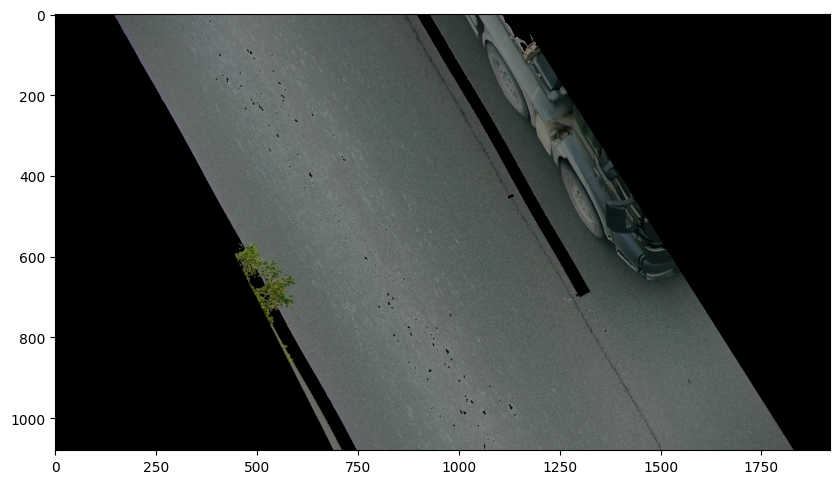

In [14]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

path = "C:/Users/pc2/Desktop/YOLOPv2/sample/sample8/"
file_list = os.listdir(path)

for file in file_list:
    try:
        src = cv2.imread(path + file)
        src_name = os.path.splitext(file)
        dst = src.copy()

        gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                            cv2.THRESH_BINARY, 9, 3)

        ret, thresh = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)

        canny = cv2.Canny(th3, 1500, 3000, apertureSize = 5, L2gradient = False)
                    
        left_fitx, right_fitx = extract_boundary(new_lines)

        pts2 = extend_line(left_fitx, right_fitx)

        result, warp_zero = fill_poly(pts2)

        src2 = convert_jpg2png(src)

        result2 = trim_lane(src2, warp_zero, thresh)

        cv2.imwrite("./sample/result/" + src_name[0] + ".jpg", result2)
    except:
        pass

plt.figure(figsize = (10,10))
plt_show(result2)
# show(result2)

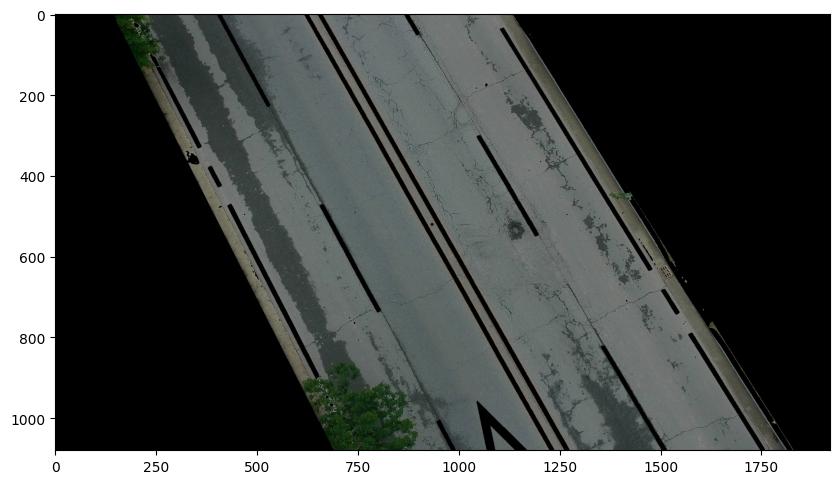

In [48]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

path = "C:/Users/pc2/Desktop/YOLOPv2/sample/sample8/"
file_name = "2023-05-19_132619.950.jpg"

src = cv2.imread(path + file_name)
src_name = os.path.splitext(file_name)
dst = src.copy()
dst2 = src.copy()

gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, 9, 3)

ret, thresh = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)

canny = cv2.Canny(th3, 1500, 3000, apertureSize = 5, L2gradient = False)

def hough_transform(canny_image, org_img):
    lines = cv2.HoughLinesP(canny_image, 0.8, np.pi / 180, 90, minLineLength = 30, maxLineGap = 1)

    degree_list = []
    new_lines = []

    for i in lines:
        if int(i[0][2]) - int(i[0][0]) == 0:
            a = 0
            cv2.line(org_img, (int(i[0][0]),0), (int(i[0][0]), int(org_img.shape[1])) ,(0, 0, 255), 1, cv2.LINE_AA)
            new_lines.append(i)
        else:
            a = (int(i[0][3]) - int(i[0][1])) / (int(i[0][2]) - int(i[0][0]))
            if abs(a) > 1 and abs(a) < 2:
                b = int(i[0][1]) - a * int(i[0][0])
                cv2.line(org_img, (0, int(b)), (int(org_img.shape[1]), int(a*org_img.shape[1]+b)), (0, 0, 255), 1, cv2.LINE_AA)
                new_lines.append(i)
        degree_list.append(a)
        
    return new_lines, lines, degree_list
    
new_lines, _, _ = hough_transform(canny, dst)

# 왼쪽, 오른쪽 경계 추출
def extract_boundary(new_line_list):
    fitx_list = []

    for i in new_line_list:
        fitx_list.append(i[0][0])
        
    min_x = min(fitx_list)
    max_x = max(fitx_list)

    for j in new_line_list:
        if j[0][0] == min_x:
            left_fitx = j
        elif j[0][0] == max_x:
            right_fitx = j
            
    return left_fitx, right_fitx
            
left_fitx, right_fitx = extract_boundary(new_lines)

# 경계선 연장
def extend_line(left_fitx, right_fitx):
    if int(left_fitx[0][2]) - int(left_fitx[0][0]) == 0:
        left_line = np.array([int(left_fitx[0][0]), 0, int(left_fitx[0][0]), dst.shape[1]])
    else:
        a = (int(left_fitx[0][3]) - int(left_fitx[0][1])) / (int(left_fitx[0][2]) - int(left_fitx[0][0]))
        b = int(left_fitx[0][1]) - a * int(left_fitx[0][0])
        left_line = np.array([0, int(b), int(dst.shape[1]), int(a * dst.shape[1] + b)])

    if int(right_fitx[0][2]) - int(right_fitx[0][0]) == 0:
        right_line = np.array([int(right_fitx[0][0]), 0, int(right_fitx[0][0]), dst.shape[1]])
    else:
        a = (int(right_fitx[0][3]) - int(right_fitx[0][1])) / (int(right_fitx[0][2]) - int(right_fitx[0][0]))
        b = int(right_fitx[0][1]) - a * int(right_fitx[0][0])
        right_line = np.array([0, int(b), int(dst.shape[1]), int(a * dst.shape[1] + b)])

    left_fitx_split = np.split(left_line, 2, axis = 0)
    right_fitx_split = np.split(right_line, 2, axis = 0)

    pts = np.concatenate((left_fitx_split, right_fitx_split), axis = 0)

    pts2 = np.array([pts[0], pts[1], pts[3], pts[2]])

    return pts2

pts2 = extend_line(left_fitx, right_fitx)

# 경계선 내부 채우기
def fill_poly(pts2):
    warp_zero = np.zeros([dst.shape[0], dst.shape[1]])
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    cv2.fillPoly(warp_zero, np.int_([pts2]), (255))
    cv2.fillPoly(color_warp, np.int_([pts2]), (216, 168, 74))

    result = cv2.addWeighted(src, 1, color_warp, 0.4, 0, dtype = cv2.CV_8U)
    
    return result, warp_zero

result, warp_zero = fill_poly(pts2)

# jpg to png
# def convert_jpg2png(org_img):
#     cv2.imwrite("./convert.png", org_img)
#     png_img = cv2.imread("./convert.png")
#     png_img2 = cv2.cvtColor(png_img, cv2.COLOR_BGR2BGRA)

#     return png_img2
    
# src2 = convert_jpg2png(src)

# 도로 외 영역, 차선 제거
def trim_lane(image, warp, binary):
    
    image[warp == 0] = image[warp == 0] * [0,0,0]
    image[binary != 0] = image[binary != 0] * [0,0,0]
    
    # for k in range(len(fitx_list)):
    #     for i, j in zip(fitx_list[k], ploty):
    #         cv2.line(image, (int(i), int(j)), (int(i), int(j)), (0), 10)
    
    return image

result2 = trim_lane(dst2, warp_zero, thresh)


cv2.imwrite("./sample/result3/" + src_name[0] + ".jpg", result2)

plt.figure(figsize = (10,10))
plt_show(result2)
# show(result2)